# Big Data Mart Sales Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv(r"F:\bdm_test.csv")
train =  pd.read_csv(r"F:\bdm_train.csv")

In [3]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


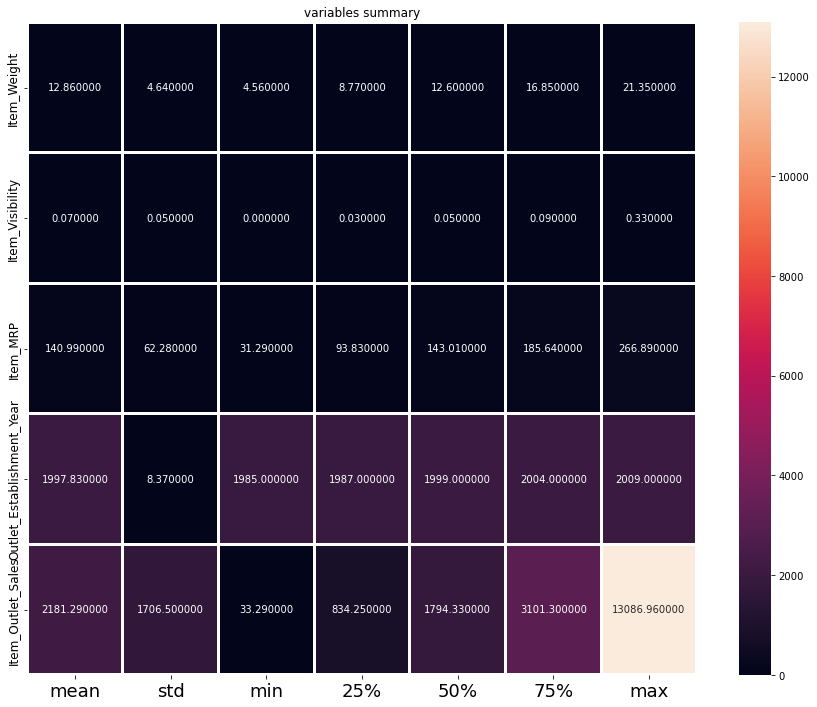

In [6]:
plt.figure(figsize=(15,12))
sns.heatmap(round(train.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variables summary')
plt.show()

In [7]:
#Item_Weight is numerical column so we fill it with Mean Imputation

train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [8]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [9]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [11]:
#Outlet_Size is catagorical column so we fill it with Mode Imputation

train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
train['Outlet_Size'].mode()


0    Medium
dtype: object

In [13]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [14]:
train.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
test.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Selecting features based on general requirements¶


In [16]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [17]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# EDA

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

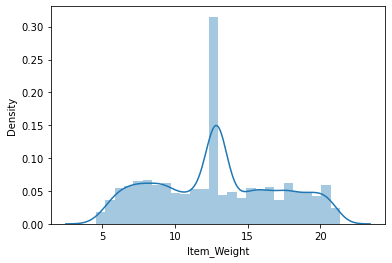

In [18]:
sns.distplot(train['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

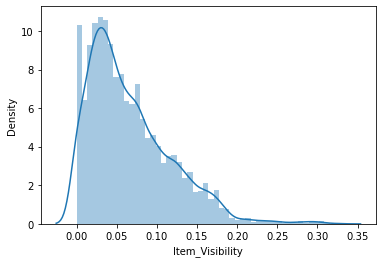

In [19]:
sns.distplot(train['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

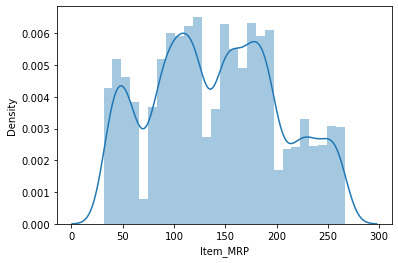

In [20]:
sns.distplot(train['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

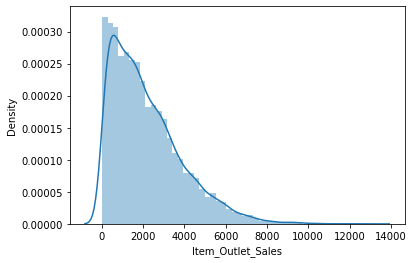

In [21]:
sns.distplot(train['Item_Outlet_Sales'])

In [22]:
# log transformation
train['Item_Outlet_Sales'] = np.log(1+train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

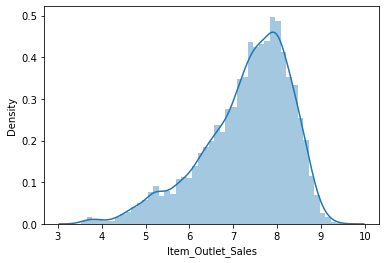

In [23]:
sns.distplot(train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

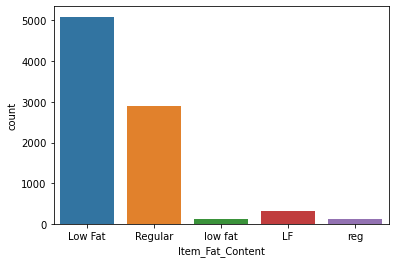

In [24]:
sns.countplot(train.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

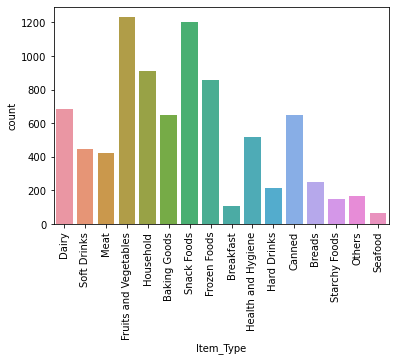

In [25]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

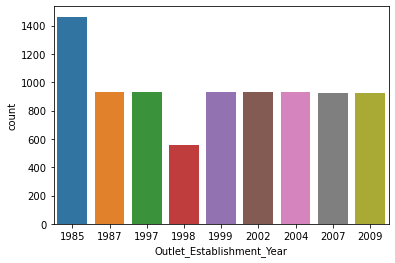

In [26]:
sns.countplot(train['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

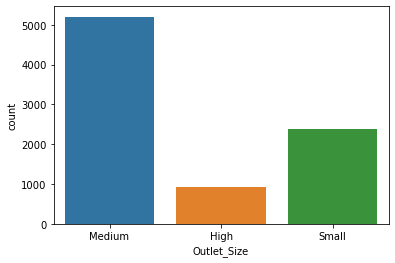

In [27]:
sns.countplot(train['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

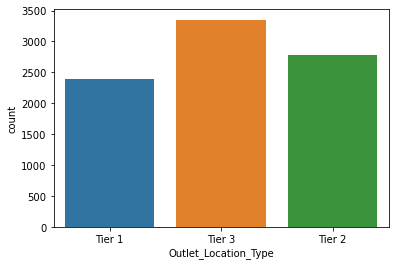

In [28]:
sns.countplot(train['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

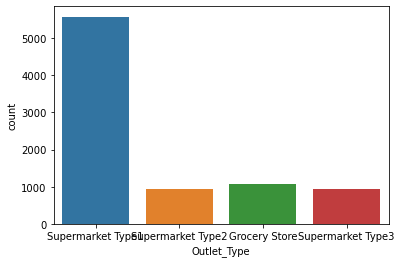

In [29]:
sns.countplot(train['Outlet_Type'])

This shows that our Item_Identifier has some duplicate values. since a product can exist in more than one store it is expected for this repetition.


# Univariate Analysis

In Univariate analysis we will explore each variable in a dataset.

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

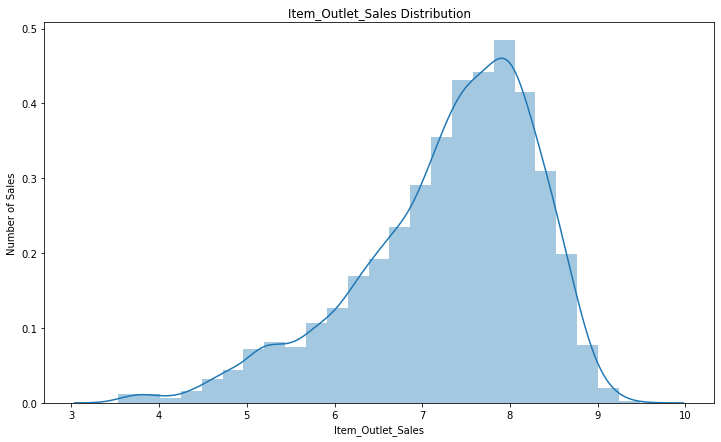

In [37]:
#Distribution of the target variable: Item_Outlet_Sales
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [38]:
print ("Skew is:", train.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % train.Item_Outlet_Sales.kurt())

Skew is: -0.8822656923242802
Kurtosis: 0.532920


We can see that our target variable is skewed towards the right. Therefore, we have to normalize it.


In [39]:
num_features = train.select_dtypes(include=[np.number])
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

We can see that out of 12 we have only 5 numeric variables.


# Correlation

In [40]:
corr=num_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.008059
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.192996
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.509886
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,0.077032
Item_Outlet_Sales,0.008059,-0.192996,0.509886,0.077032,1.000000


<AxesSubplot:>

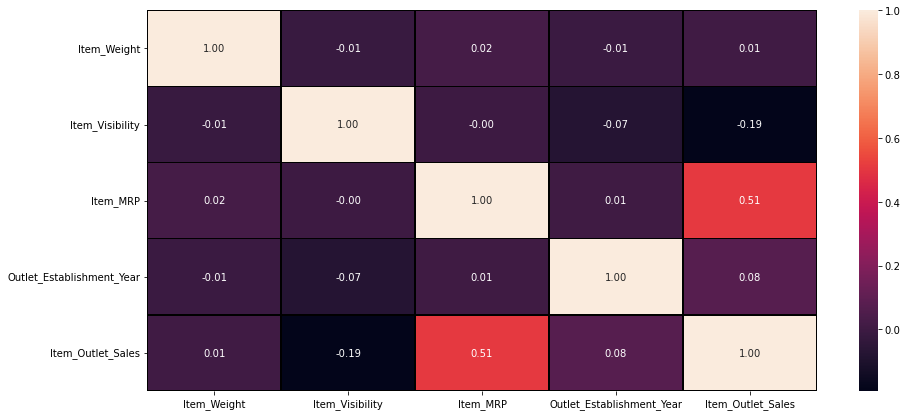

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(), annot=True, linewidths=0.5,linecolor="black",fmt='.2f')

In [42]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.509886
Outlet_Establishment_Year    0.077032
Item_Weight                  0.008059
Item_Visibility             -0.192996
Name: Item_Outlet_Sales, dtype: float64

From the above result, we can see that Item_MRP have the most positive correlation and the Item_Visibility have the lowest correlation with our target variable.

# Bivariate Analysis

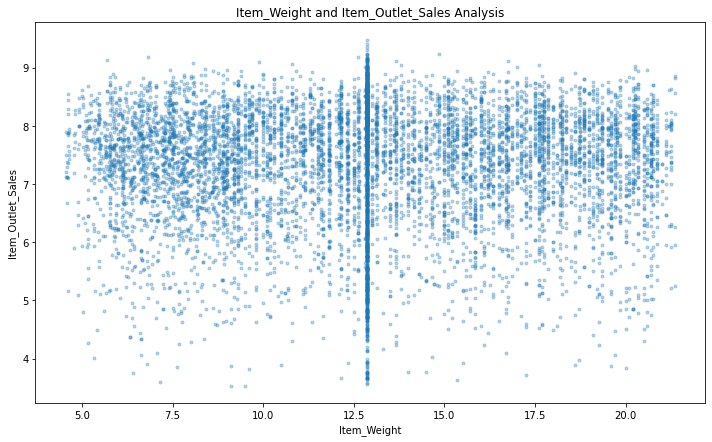

In [43]:
#Item_Weight and Item_Outlet_Sales analysis
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

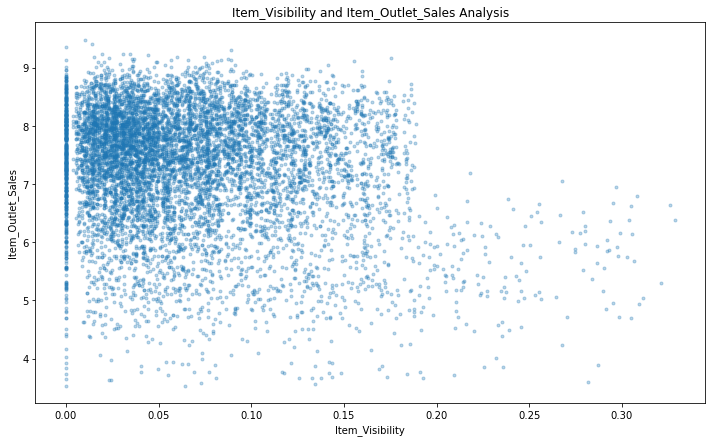

In [44]:
#Item_Visibility and Item_Outlet_Sales analysis
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

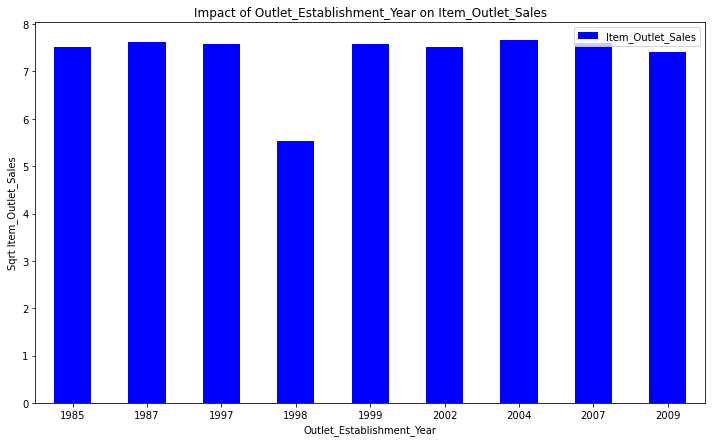

In [45]:
#Outlet_Establishment_Year and Item_Outlet_Sales analysis
Outlet_Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

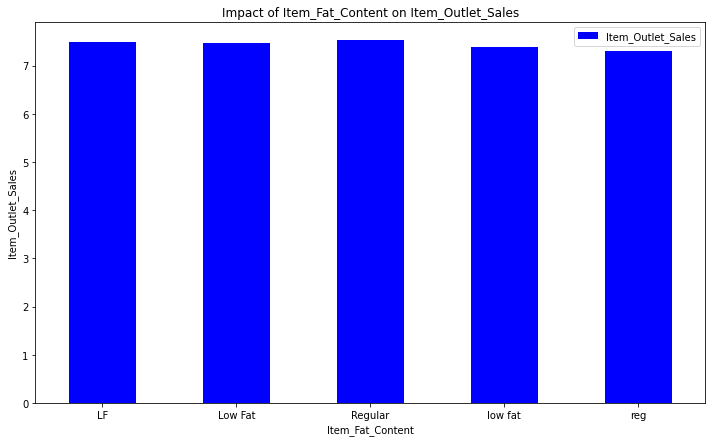

In [46]:
#Impact of Item_Fat_Content onItem_Outlet_Sales
Item_Fat_Content_pivot = train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Low Fat products seem to higher sales than the Regular products


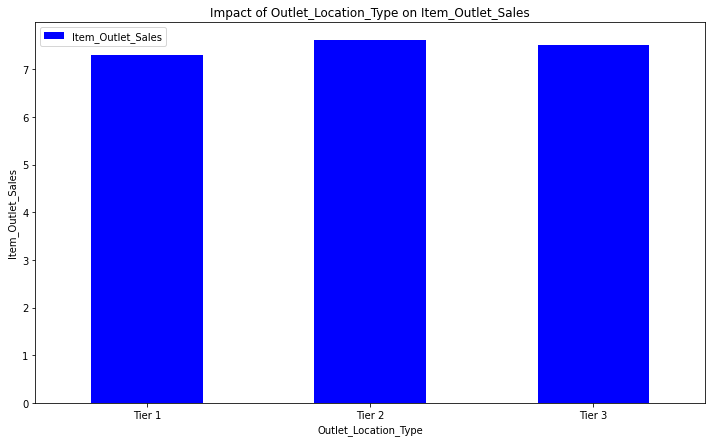

In [49]:
#Impact of Outlet_Location_Type on Item_Outlet_Sales
Outlet_Location_Type_pivot = train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [50]:
train.pivot_table(values='Outlet_Location_Type',
                  columns='Outlet_Type',
                  aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


# Data Pre-Processing


We have two datasets the first one train.csv and the second is test.csv. Let’s combine them into a dataframe data with a source column specifying where each observation belongs, so that we don’t have to do pre-processing separately.


In [51]:
# Join Train and Test Dataset
# Create source column to later separate the data easily
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 11) (5681, 10) (14204, 11)


Now checking for the percentage of missing values present in our data:


In [52]:
data.isnull().sum()/data.shape[0]*100 

Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
source                        0.000000
dtype: float64

Note that Item_Outlet_Sales is the target variable and contains missing values because our test data does not have the Item_Outlet_Sales column.
Nevertheless, we’ll impute the missing values in Item_Weight and Outlet_Size.

 Imputing Missing ValuesIn our EDA section, we have seen that the Item_Weight and the Outlet_Size had missing values.
In our EDA section, we have seen that the Item_Weight and the Outlet_Size had missing values.


In [ ]:
#Imputing Outlet_Size missing values with the mode

In [55]:
#Import mode function:
from scipy.stats import mode 
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())

outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Medium,Medium,Medium,Medium


In [56]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]

    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size']      [outlet_size_mode.columns == Type][0]
    else:
        return Size

print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))

data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)

print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 0
Final #missing: 0


In [57]:
#Creates pivot table with Outlet_Type and the mean of 
#Item_Outlet_Sales. Agg function is by default mean()

data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,5.551226,7.509277,7.33211,8.025963


In [59]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

Item_Type is having 16 unique categories which might to be very useful in our analysis. So it’s a good idea to combine them. Take a close look at Item_identifier each item starts with FD” (Food), “DR” (Drinks) or “NC” (Non-Consumables). We can group the items within these 3 categories.

In [61]:
#Change the category of low fat
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified categories')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                  'low fat':'Low Fat',
                                  'reg':'Regular'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified categories
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


# Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [64]:
train= train.apply(le.fit_transform)
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,284,1,664,4,5592,4,1,0,1,2540,0
1,57,2,880,14,473,8,1,2,2,422,0
2,376,1,715,10,2901,4,1,0,1,1639,0
3,393,2,0,6,4227,3,1,2,0,670,0
4,265,1,0,9,627,1,0,2,1,865,0
...,...,...,...,...,...,...,...,...,...,...,...
8518,125,1,3912,13,4955,1,0,2,1,2047,0
8519,233,2,3278,0,2023,5,1,1,1,516,0
8520,299,1,2302,8,1263,6,2,1,1,1018,0
8521,149,2,7175,13,1857,8,1,2,2,1466,0


# Onehot Encoding

In [65]:
train = pd.get_dummies(train,columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,284,664,4,5592,4,2540,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,57,880,14,473,8,422,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
2,376,715,10,2901,4,1639,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
3,393,0,6,4227,3,670,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0
4,265,0,9,627,1,865,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


# Splitting our data into train and test

In [74]:
X=train.drop('Item_Outlet_Sales',axis=1)
Y=train['Item_Outlet_Sales']

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# Standarization

In [77]:
X.describe()


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,source,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.0,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,298.756776,3709.198639,7.226681,2941.096562,3.790684,0.0,0.037076,0.597090,0.338965,0.013141,...,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,95.451067,2396.606857,4.209990,1675.483234,2.730322,0.0,0.188960,0.490512,0.473386,0.113885,...,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.000000,1595.500000,4.000000,1535.500000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,326.000000,3708.000000,6.000000,2949.000000,4.000000,0.0,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,361.000000,5789.500000,10.000000,4351.500000,6.000000,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,415.000000,7879.000000,15.000000,5937.000000,8.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [79]:
X_train_std= sc.fit_transform(X_train)


In [80]:
X_test_std= sc.transform(X_test)


In [81]:
X_train_std


array([[ 1.00439018,  0.96533577, -0.75847359, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.23760194,  0.19186569,  1.60759199, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 1.01496562,  0.29157407,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [ 0.23238346, -1.19862827,  0.18795264, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-0.09545501,  1.29992208, -1.70489982, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [ 0.62367454,  1.53980627,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513]])

In [82]:
X_test_std


array([[ 0.06317651,  0.04042575,  0.18795264, ..., -1.36686554,
         2.8659228 , -0.35759513],
       [ 0.86690953, -0.4451833 ,  1.37098543, ...,  0.73160085,
        -0.34892775, -0.35759513],
       [-1.15299846,  0.48515019, -1.46829326, ...,  0.73160085,
        -0.34892775, -0.35759513],
       ...,
       [ 0.61309911,  1.08506928,  0.89777232, ..., -1.36686554,
        -0.34892775, -0.35759513],
       [ 0.77173062, -1.55115374,  0.4245592 , ..., -1.36686554,
         2.8659228 , -0.35759513],
       [-2.33744713, -1.47230485,  0.66116576, ...,  0.73160085,
        -0.34892775, -0.35759513]])

In [83]:
Y_train


3684     144
1935    1311
5142    1242
4978    1426
2299    2462
        ... 
599     3137
5695    1193
8006    1684
1361    2001
1547     746
Name: Item_Outlet_Sales, Length: 6818, dtype: int64

In [84]:
Y_test


8179     801
8355    2056
3411    1529
7089     779
6954    1858
        ... 
1317    1386
4996     808
531      356
3891    1144
6629    1839
Name: Item_Outlet_Sales, Length: 1705, dtype: int64

# Model Building

In [85]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [86]:
lr.fit(X_train_std,Y_train)


LinearRegression()

In [87]:
X_test.head()


,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,source,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
8179,305,3815,8,1753,8,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
8355,381,2651,13,3152,1,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
3411,190,4881,1,1062,2,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0
7089,408,3427,6,207,7,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
6954,175,1624,3,3291,5,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [88]:
Y_pred_lr=lr.predict(X_test_std)


In [89]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [90]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.6241125017539562
446.0129473103805
557.9233500595068


In [91]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [92]:
rf.fit(X_train_std,Y_train)


RandomForestRegressor(n_estimators=1000)

In [93]:
Y_pred_rf= rf.predict(X_test_std)


In [94]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.6141091184748032
429.5687806451613
565.2985287760448


# Hyper Parameter Tuning

In [95]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   59.1s remaining:   59.1s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min finished


Best: 0.622 using {'n_estimators': 1000}
0.590 (0.004) with: {'n_estimators': 10}
0.618 (0.003) with: {'n_estimators': 100}
0.622 (0.003) with: {'n_estimators': 1000}


In [96]:
grid_search_forest.best_params_


{'n_estimators': 1000}

In [97]:
grid_search_forest.best_score_


0.622088452405593

In [98]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)


In [99]:
r2_score(Y_test,Y_pred_rf_grid)


0.6139608256568507

# Model Saving

In [102]:
import pickle
filename = 'Big Data Mart.pkl'
pickle.dump(le, open(filename, 'wb'))